In [1]:
import pandas as pd
import geopandas as gpd

Link to dataset: https://datacatalog.cookcountyil.gov/Property-Taxation/Assessor-Archived-05-11-2022-Residential-Property-/bcnq-qi2z

In [2]:
df = pd.read_csv('source/Assessor__Archived_05-11-2022__-_Residential_Property_Characteristics.csv')

/tmp/ipykernel_42402/3352760806.py:1: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('source/Assessor__Archived_05-11-2022__-_Residential_Property_Characteristics.csv')


In [3]:
df.head()

,PIN,Property Class,Tax Year,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,...,Location Factor,Garage indicator,Residential share of building,Pure Market Sale,Pure Market Filter,Neigborhood Code (mapping),Square root of lot size,Square root of age,Square root of improvement size,Town and Neighborhood
0,1011000040000,212,2018,12,11055,10,2.0,5.0,1.0,2.0,...,2.084499,1.0,NaN,0,0,12,105.142760,11.618950,43.634848,1012
1,1011000050000,205,2018,12,6534,10,2.0,0.0,1.0,1.0,...,2.079861,1.0,NaN,0,0,12,80.833162,10.677078,39.522146,1012
2,1011000060000,212,2018,12,6534,10,2.0,3.0,2.0,1.0,...,2.076376,1.0,NaN,0,0,12,80.833162,10.440307,40.951190,1012
3,1011000090000,212,2018,12,13571,10,2.0,2.0,2.0,2.0,...,2.061552,1.0,NaN,0,0,12,116.494635,8.717798,67.416615,1012
4,1011000170000,205,2018,12,9027,10,2.0,0.0,1.0,1.0,...,2.096602,0.0,NaN,0,0,12,95.010526,11.090537,39.799497,1012


In [5]:
df['Longitude']

0         -88.139621
1         -88.139379
2         -88.139196
3         -88.138427
4         -88.140521
             ...    
1995103   -87.537609
1995104   -87.536465
1995105   -87.538029
1995106   -87.537437
1995107   -87.536193
Name: Longitude, Length: 1995108, dtype: float64

In [6]:
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude))

<AxesSubplot:>

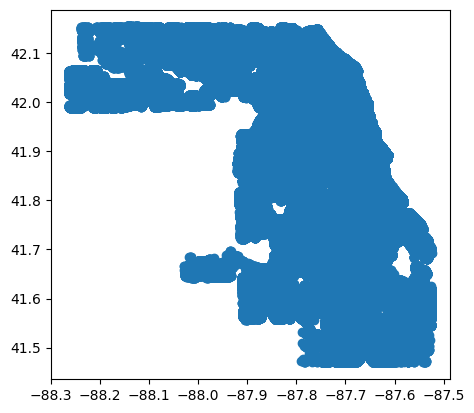

In [7]:
gdf.plot()

In [9]:
len(df)

1995108

In [4]:
len(df[df['Basement Finish'].notnull()])

1393050

In [5]:
1393050/1995108

0.6982328776186553

<AxesSubplot:>

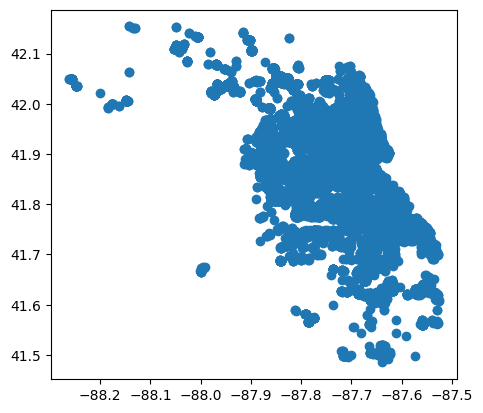

In [13]:
# plot only places with basements apartments - looks like it's mostly in Chicago
gdf[gdf['Basement Finish'] == 2].plot()

<AxesSubplot:>

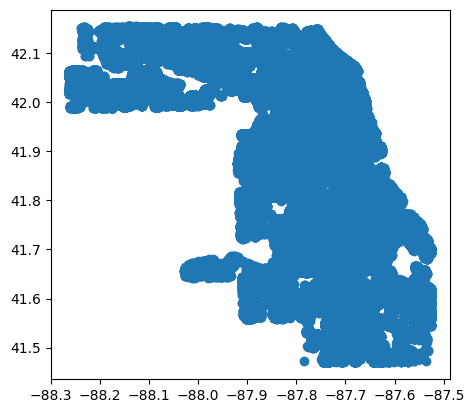

In [14]:
# all of cook county seems to have lots of finished basements
gdf[gdf['Basement Finish'] == 1].plot()

In [15]:
len(df[df['Basement Finish'] == 2])/len(df[df['Basement Finish'].notnull()])

0.017303757941208142

There are more than 24,000 basement apartments

In [16]:
# number of apartments with basements
# Basement finish - 1 = Formal rec room; 2 = Apartment; 3 = Unfinished
len(df[df['Basement Finish'] == 2])

24105

In [8]:
# number of finished basements as rec rooms
len(df[df['Basement Finish'] == 1])

425857

In [9]:
425857/len(df)

0.21345060016801096

In [17]:
len(df[df['Floodplain'] == 1])

95834

<AxesSubplot:>

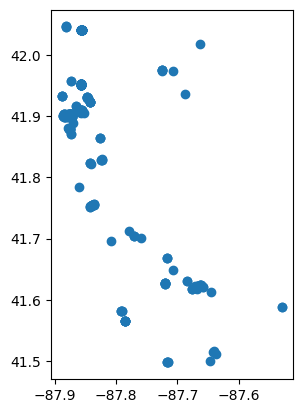

In [18]:
gdf[(gdf['Floodplain'] == 1) & (gdf['Basement Finish'] == 2)].plot()

<AxesSubplot:>

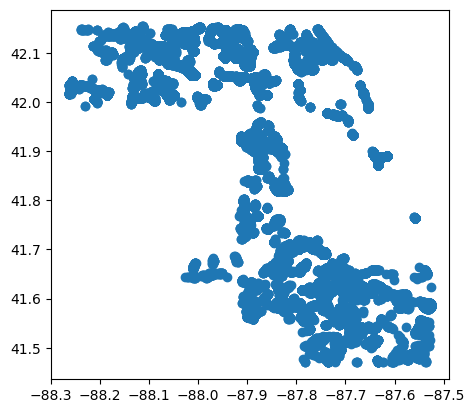

In [19]:
gdf[gdf['Floodplain'] == 1].plot()